<a href="https://colab.research.google.com/github/dhirajyadav07/Data-Science/blob/main/imbalenced_dataset_and_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
no_sample=1000
class_0_ratio=0.9
no_class_0=int(no_sample*class_0_ratio)
no_class_1=no_sample-no_class_0

In [4]:
no_class_0,no_class_1

(900, 100)

In [5]:
class_0=pd.DataFrame({
    'feature_1':np.random.normal(0,1,size=no_class_0),
    'feature_2':np.random.normal(0,1,size=no_class_0),
    'target':[0]*no_class_0
})

In [6]:
class_0

,feature_1,feature_2,target
0,0.476093,0.359849,0
1,-0.241599,0.484781,0
2,0.922631,-0.538227,0
3,0.454668,1.342746,0
4,-0.292064,-1.470297,0
...,...,...,...
895,-0.161747,0.210399,0
896,0.422372,-0.668617,0
897,-1.352663,-0.439720,0
898,1.356375,0.554197,0


In [7]:
class_1=pd.DataFrame({
    'feature_1':np.random.normal(3,1,size=no_class_1),
    'feature_2':np.random.normal(3,1,size=no_class_1),
    'target':[1]*no_class_1
})

In [8]:
class_1

,feature_1,feature_2,target
0,3.407733,4.723793,1
1,3.467166,3.828236,1
2,1.978805,1.864596,1
3,2.306035,2.597190,1
4,2.438710,4.905142,1
...,...,...,...
95,3.161753,3.997459,1
96,2.259324,1.644116,1
97,2.799951,2.816382,1
98,2.946048,5.411613,1


In [9]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
# reset index krne se duplicate index ka dr nhi rhega kyuki class_0 and class_1 dono ke paas same index ho sakte h kyuki dono alag alag data frame tha

In [10]:
df.head()

,feature_1,feature_2,target
0,0.476093,0.359849,0
1,-0.241599,0.484781,0
2,0.922631,-0.538227,0
3,0.454668,1.342746,0
4,-0.292064,-1.470297,0


In [11]:
df.target.value_counts()

,count
target,
0,900
1,100


In [12]:
#UpScaling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]


In [13]:
from sklearn.utils import resample

In [14]:
resampled_df=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [15]:
resampled_df.shape

(900, 3)

In [16]:
upsampled_df=pd.concat([df_majority,resampled_df])

In [17]:
upsampled_df.shape

(1800, 3)

In [18]:
upsampled_df.target.value_counts()

,count
target,
0,900
1,900


In [19]:
## now we do underSampling
undersampled_df=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [20]:
undersampled_df.shape

(100, 3)

In [21]:
UnderSampled_df=pd.concat([df_minority,undersampled_df])

In [22]:
UnderSampled_df.target.value_counts()

,count
target,
1,100
0,100


In [23]:
# SMOTE

from sklearn.datasets import make_classification

In [24]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [25]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [26]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
len(y[y==1])

106

In [28]:
df1=pd.DataFrame(x,columns=['f1','f2'])

In [29]:
df1

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
995,2.210439,2.006772
996,1.910941,2.011860
997,-0.556625,-0.159837
998,1.004999,0.936290


In [30]:
df2=pd.DataFrame(y,columns=['target'])
df2

,target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [31]:
final_df=pd.concat([df1,df2],axis=1)

In [32]:
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


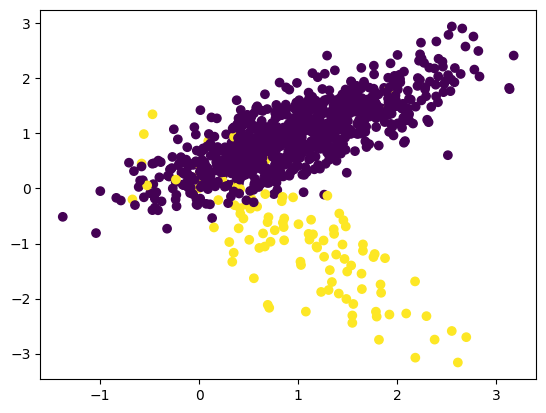

In [33]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])


In [34]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()

In [35]:
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [37]:
x.shape

(1788, 2)

In [38]:
y.shape

(1788,)

In [40]:
y.value_counts()

,count
target,
1,894
0,894


### Now both the counts are equal

In [43]:
df1 = pd.DataFrame(x, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
oversample_df = pd.concat([df1, df2], axis=1)
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,-0.000094,0.397096,1
1784,-0.157039,0.238407,1
1785,-0.204691,0.160907,1
1786,1.453337,-0.977005,1


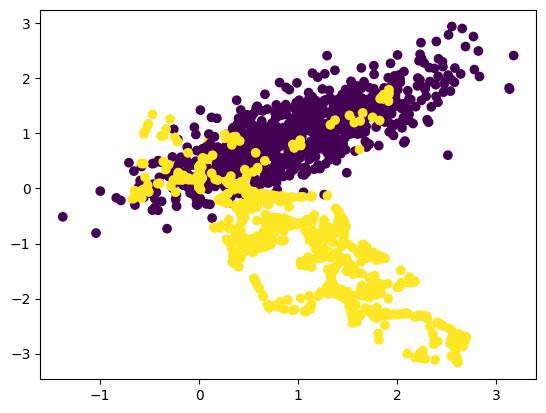

In [44]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

Now we clearly see the minority dot yellow are now equal in density to purple dot